# K-means clustering
_María Camila Vásquez Correa_

### Necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
%matplotlib inline

## Data loading
We will load the data, the higher dimensional data and the embbeding

In [2]:
n = 150  # Number of samples
N = 4    # Number of features
X = load_iris().data.T
# Normalization
for i in range(N):
    X[i] = X[i]/np.max(X[i])
X = X.T
Y = pd.read_csv('iris_embbeding.csv').values
X1 = pd.read_csv('high_dimension_iris.csv').values

In [10]:
n = 284807  # Number of samples
N = 30    # Number of features
X = pd.read_csv('creditcard.csv').values.T
# Normalization
for i in range(N):
    X[i] = X[i]/np.max(X[i])
X = X.T
Y = pd.read_csv('credit_embbeding.csv').values
X1 = pd.read_csv('credit_pca.csv').values

### Parameters

In [15]:
k = 5
epsilon = 0.005
n_iter = 1000
metric = 'euclidean'

In [16]:
def cost_function(clusters, data):
    A = data.reshape((*data.shape,1))
    B = clusters.reshape((1,*clusters.shape))
    J = cdist(clusters, data, metric = metric) 
    J = np.sum(np.min(J, axis=-1))
    return J

In [17]:
# Compute the matrix U
def compute_U(clusters, data):
    U = cdist(clusters, data, metric = metric).T 
    U = np.argmin(U, axis=-1)    
    return U

In [18]:
def update_cluster(U, data):
    c = np.arange(k).reshape(k,1)
    mask = U == c
    mask = np.expand_dims(mask,axis = -1)
    A = np.expand_dims(data, axis = 0)
    mask = np.where(mask, A, np.nan)
    new_cluster = np.nanmean(mask, axis = 1)
    return new_cluster

In [19]:
# Initialize the centers
c_random = np.random.randint(0,n,k)
clusters = X[c_random]
cluster_index = c_random

In [20]:
# Ciclo principal
J = np.inf
i = 0
while (J > epsilon) & (i < n_iter):
    # computar la matrix U
    U = compute_U(clusters, X)
    # computar el costo
    J = cost_function(clusters, X)
    # actualizar los clusters
    clusters = update_cluster(U = U, data = X)
    i += 1

In [21]:
clusters

array([[ 5.05225599e-01,  6.04755702e-01, -1.83298671e-02,
        -3.44477561e-02,  1.30659600e-02, -8.24726674e-03,
        -7.95919611e-04, -2.61871241e-03,  1.54078426e-03,
         8.83008867e-03,  7.57401006e-03,  5.66592557e-03,
         2.01895444e-02, -2.05464985e-02,  2.40691508e-03,
         1.20908415e-02,  3.52706244e-03, -2.33293123e-03,
        -4.64782538e-02, -2.82505410e-03, -2.18156548e-03,
        -1.79152123e-03, -8.07405493e-03,  9.89531760e-04,
        -2.31221200e-03,  2.28682882e-02,  2.18792007e-02,
        -4.59874354e-04, -2.25512829e-04,  2.21633976e-03,
         2.86667895e-04],
       [ 8.54059476e-01,  2.98883447e-01,  7.81887191e-04,
        -8.06739804e-02, -7.04518255e-03,  8.93871063e-03,
        -1.80568237e-03,  1.88440393e-03, -2.80642379e-03,
        -7.93325518e-04, -4.47510895e-03, -7.90116261e-03,
         2.55768846e-02,  5.45040761e-03, -3.00220467e-02,
        -2.10474387e-02, -8.43517922e-05, -5.24650409e-03,
         8.05512842e-02,  2.15

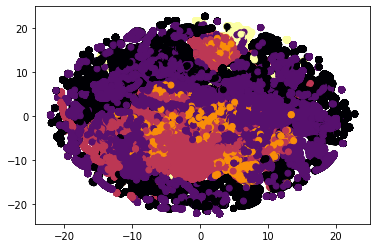

In [22]:
plt.scatter(Y[:, 0], Y[:, 1], c=U, cmap = 'inferno')
plt.show()